In [2]:
#Loading Required Packages

In [ ]:
#Kindly insatll dependencies in case of any errors
#pip install xgboost
#pip install lightgbm

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
from sklearn.tree import export_graphviz

##Loading Required Packagesimport pydotplus
from sklearn.externals.six import StringIO  
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#frames = [df1, df2, df3]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.model_selection import train_test_split
import gc
gc.collect()
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading Data
df = pd.read_csv('D:\\Akhil\\CV\\CV dated 27 july19\\Hastings DS\\interview\\Dataset\\DS_Assessment_Dataset.csv')
print("The Shape of the dataset is :", df.shape)
df.head()

The Shape of the dataset is : (50000, 10)


,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale
0,48.000,7000.000,41.962,419.620,7000.000,366.106,8.712,29/05/2016,M,0
1,32.000,8000.000,53.449,534.489,6000.000,306.560,8.755,03/07/2015,S,0
2,32.000,7000.000,48.043,480.428,6000.000,430.070,6.943,04/10/2015,M,0
3,32.000,10000.000,38.572,385.722,7000.000,493.840,9.165,22/09/2016,S,0
4,28.000,9000.000,33.317,333.173,5000.000,416.460,6.811,08/09/2015,M,0


In [5]:
df.dtypes

Driver_Age              float64
Vehicle_Value           float64
Tax                     float64
Price                   float64
Vehicle_Mileage         float64
Credit_Score            float64
Licence_Length_Years    float64
Date                     object
Marital_Status           object
Sale                      int64
dtype: object

### Data Exploration


### Check for Null values


In [6]:
df.isnull().sum() 


Driver_Age              494
Vehicle_Value           509
Tax                     481
Price                   496
Vehicle_Mileage         536
Credit_Score            522
Licence_Length_Years    492
Date                      0
Marital_Status          488
Sale                      0
dtype: int64

,features,missing_count,missing_count_percentage
0,Driver_Age,494,0.988
1,Vehicle_Value,509,1.018
2,Tax,481,0.962
3,Price,496,0.992
4,Vehicle_Mileage,536,1.072
5,Credit_Score,522,1.044
6,Licence_Length_Years,492,0.984
7,Marital_Status,488,0.976


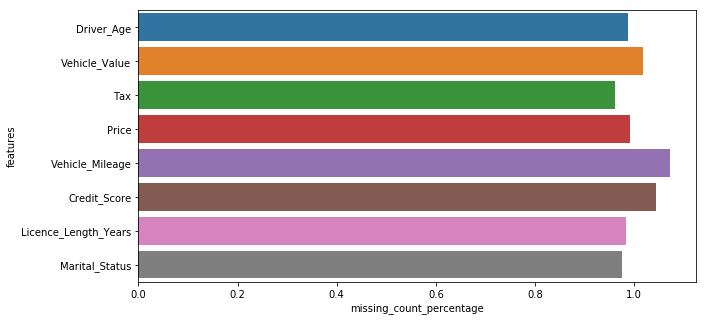

In [7]:
#Exploring missing values
df_missing= df.isnull().sum()[df.isnull().sum() !=0]
df_missing=pd.DataFrame(df_missing.reset_index())
df_missing.rename(columns={'index':'features',0:'missing_count'},inplace=True)
df_missing['missing_count_percentage']=((df_missing['missing_count'])/50000)*100
plt.figure(figsize=(10,5))
sns.barplot(y=df_missing['features'],x=df_missing['missing_count_percentage'])
df_missing

### Descriptive statistics

In [8]:
df.describe()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Sale
count,49506.000,49491.000,49519.000,49504.000,49464.000,49478.000,49508.000,50000.000
mean,29.800,8455.699,48.695,552.212,6997.008,496.299,5.827,0.698
std,7.518,1978.903,17.690,136.646,1358.295,963.420,3.291,0.459
min,18.000,2000.000,2.425,38.520,1000.000,55.887,-0.346,0.000
25%,24.000,7000.000,33.354,456.627,6000.000,346.239,2.896,0.000
50%,29.000,8000.000,50.387,560.946,7000.000,400.261,6.461,1.000
75%,35.000,10000.000,62.799,650.643,8000.000,455.128,8.367,1.000
max,74.000,15000.000,102.645,1026.452,13000.000,9999.000,16.370,1.000


## Target value distribution


In [9]:
df['Sale'].value_counts()

1    34899
0    15101
Name: Sale, dtype: int64

In [10]:
df['Marital_Status'].value_counts()

M    24596
S    20004
D     4912
Name: Marital_Status, dtype: int64

## Data Pre Processing

## Dealing Missing Values

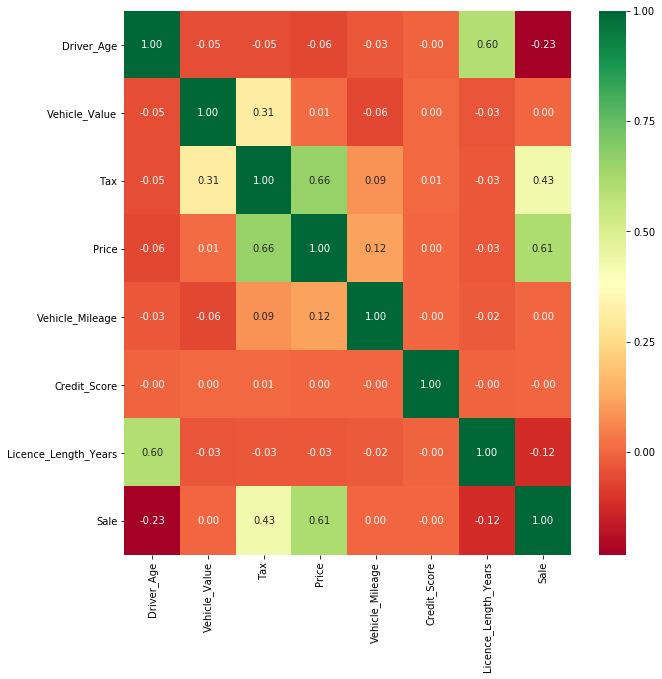

In [11]:
## Dealing Missing Values

df2 = df.copy()## Data Pre Processing

df2.fillna(0, inplace =True)
plt.figure(figsize=(10,10))
g=sns.heatmap(df2.corr(),annot=True,cmap="RdYlGn" , fmt='.2f')

In [12]:
### In order to fill the missing values a coorelation plot has been made to find the relationship between the variables
### 1) Driver age has a positive correlation with Licence_Length_Years
### 2) price also has a poaitive correlation with Sales

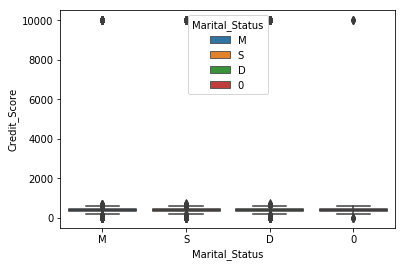

In [13]:
ax = sns.boxplot(x="Marital_Status", y="Credit_Score", hue="Marital_Status",data=df2, dodge=False)

In [14]:
"""f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(df2['Credit_Score'],  ax=axes[0, 0])
sns.distplot(df2['Driver_Age'],  ax=axes[0, 1])
sns.distplot(df2['Price'],  ax=axes[1, 0])
sns.distplot(df2['Vehicle_Mileage'],  ax=axes[1, 1])"""

"f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)\nsns.distplot(df2['Credit_Score'],  ax=axes[0, 0])\nsns.distplot(df2['Driver_Age'],  ax=axes[0, 1])\nsns.distplot(df2['Price'],  ax=axes[1, 0])\nsns.distplot(df2['Vehicle_Mileage'],  ax=axes[1, 1])"

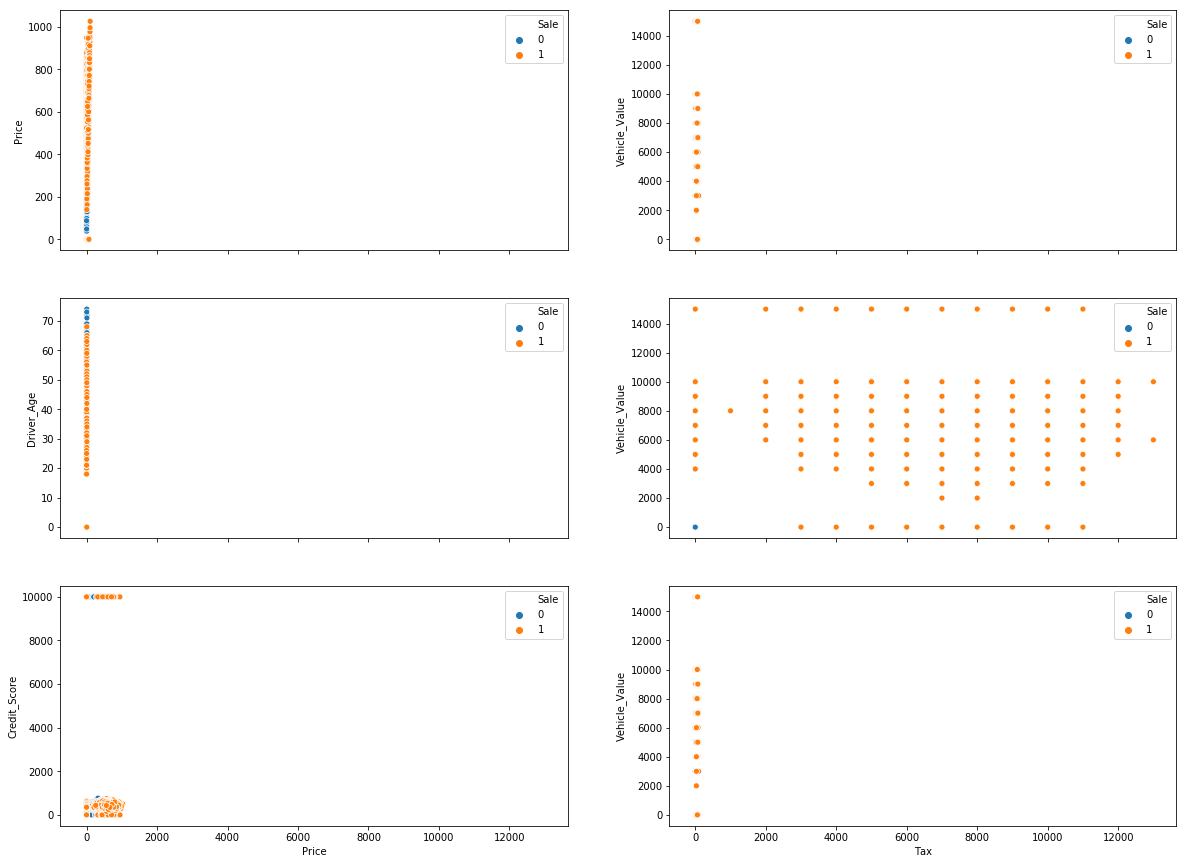

In [15]:
f, axes = plt.subplots(3, 2, figsize=(20, 15), sharex=True)

sns.scatterplot(x="Tax", y="Price", hue="Sale", data=df2,  ax=axes[0, 0])
sns.scatterplot(x="Tax", y="Vehicle_Value", hue="Sale", data=df2,  ax=axes[0, 1])
sns.scatterplot(x="Licence_Length_Years", y="Driver_Age", hue="Sale", data=df2,  ax=axes[1, 0])

sns.scatterplot(x="Vehicle_Mileage", y="Vehicle_Value", hue="Sale", data=df2,  ax=axes[1, 1])
sns.scatterplot(x="Price", y="Credit_Score", hue="Sale", data=df2,  ax=axes[2, 0])
sns.scatterplot(x="Tax", y="Vehicle_Value", hue="Sale", data=df2,  ax=axes[2, 1])

In [16]:
df.dtypes

Driver_Age              float64
Vehicle_Value           float64
Tax                     float64
Price                   float64
Vehicle_Mileage         float64
Credit_Score            float64
Licence_Length_Years    float64
Date                     object
Marital_Status           object
Sale                      int64
dtype: object

In [17]:
object_dtype= []
int_type = []
for i,j in zip(df.columns, df.dtypes):
    if j == 'int64' or j == 'float64':
        int_type.append(i)
    else:
        object_dtype.append(i)
        
print(int_type)
print(object_dtype)
    

['Driver_Age', 'Vehicle_Value', 'Tax', 'Price', 'Vehicle_Mileage', 'Credit_Score', 'Licence_Length_Years', 'Sale']
['Date', 'Marital_Status']


In [18]:
"""f, axes = plt.subplots(2, 2, figsize=(7, 16), sharex=True)
sns.distplot(df['Credit_Score'],  ax=axes[0, 0])
sns.distplot(df['Driver_Age'],  ax=axes[0, 1])
sns.distplot(df['Price'],  ax=axes[1, 0])
sns.distplot(df['Vehicle_Mileage'],  ax=axes[1, 1])"""

"f, axes = plt.subplots(2, 2, figsize=(7, 16), sharex=True)\nsns.distplot(df['Credit_Score'],  ax=axes[0, 0])\nsns.distplot(df['Driver_Age'],  ax=axes[0, 1])\nsns.distplot(df['Price'],  ax=axes[1, 0])\nsns.distplot(df['Vehicle_Mileage'],  ax=axes[1, 1])"

In [19]:
"""
def subplot(int_type):
    size = len(int_type)
    
    f, axes = plt.subplots(size, 2, figsize=(7, 16), sharex=True)
    for i,j,k in zip(int_type,range(0,size)
                    :
        sns.distplot(df['Credit_Score'],  ax=axes[0, 0])
        sns.distplot(df['Driver_Age'],  ax=axes[0, 1])
        sns.distplot(df['Price'],  ax=axes[1, 0])
        sns.distplot(df['Vehicle_Mileage'],  ax=axes[1, 1])"""

"\ndef subplot(int_type):\n    size = len(int_type)\n    \n    f, axes = plt.subplots(size, 2, figsize=(7, 16), sharex=True)\n    for i,j,k in zip(int_type,range(0,size)\n                    :\n        sns.distplot(df['Credit_Score'],  ax=axes[0, 0])\n        sns.distplot(df['Driver_Age'],  ax=axes[0, 1])\n        sns.distplot(df['Price'],  ax=axes[1, 0])\n        sns.distplot(df['Vehicle_Mileage'],  ax=axes[1, 1])"

In [20]:
df[df['Driver_Age'].isnull()]

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale
78,nan,10000.000,53.075,530.746,7000.000,264.670,9.011,24/08/2015,M,0
81,nan,9000.000,51.381,513.809,5000.000,432.369,13.694,18/08/2015,S,0
90,nan,8000.000,24.816,248.162,7000.000,376.757,5.701,21/11/2016,S,0
211,nan,6000.000,17.086,341.713,6000.000,313.800,4.966,17/04/2015,S,0
234,nan,10000.000,43.890,438.901,7000.000,423.285,6.939,30/09/2016,S,0
250,nan,6000.000,23.647,472.937,7000.000,454.753,10.009,09/01/2015,S,0
334,nan,nan,21.690,433.797,7000.000,300.072,7.584,10/01/2015,M,0
383,nan,8000.000,36.625,366.255,8000.000,324.376,7.657,15/07/2015,S,0
443,nan,10000.000,64.127,641.268,5000.000,495.550,9.342,30/03/2016,S,0
478,nan,9000.000,46.930,469.300,9000.000,338.816,8.902,06/08/2016,M,0


In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression

#df[df['Licence_Length_Years'] == 0 ]

#df['Licence_Length_Years'].fillna(0, inplace = True)

X = np.array(df[df['Driver_Age'].notnull() & df['Licence_Length_Years'].notnull() ]['Licence_Length_Years']).reshape(-1, 1)
Y= df[df['Driver_Age'].notnull() & df['Licence_Length_Years'].notnull() ]['Driver_Age']
#X_test =  np.array(df[df['Driver_Age'].isnull()]['Licence_Length_Years']).reshape(-1, 1)

model = LinearRegression()

In [22]:
model = LinearRegression().fit(X, Y)
#Y_test = model.predict(X_test)
print('intercept:', model.intercept_)

print('slope:', model.coef_)


intercept: 20.72532313263075
slope: [1.56315899]


In [23]:
#df['Driver_Age'].fillna(1, inplace = True)
df['Imputed_Driver_age'] = 21.08 + (1.51 * df[df['Driver_Age'].isnull()]['Licence_Length_Years'])
df[df['Imputed_Driver_age'].notnull()].head()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale,Imputed_Driver_age
78,nan,10000.000,53.075,530.746,7000.000,264.670,9.011,24/08/2015,M,0,34.686
81,nan,9000.000,51.381,513.809,5000.000,432.369,13.694,18/08/2015,S,0,41.758
90,nan,8000.000,24.816,248.162,7000.000,376.757,5.701,21/11/2016,S,0,29.689
211,nan,6000.000,17.086,341.713,6000.000,313.800,4.966,17/04/2015,S,0,28.579
234,nan,10000.000,43.890,438.901,7000.000,423.285,6.939,30/09/2016,S,0,31.558


In [24]:
df['Driver_Age'].fillna(1, inplace = True)
for i,j,k in zip(range(0,df['Driver_Age'].shape[0]),df['Driver_Age'], df['Imputed_Driver_age']):
     if  j == 1:
        df.loc[i, 'Driver_Age'] = k
     #   print(i,j,k)

In [25]:
df[df['Imputed_Driver_age'].notnull()].head()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale,Imputed_Driver_age
78,34.686,10000.000,53.075,530.746,7000.000,264.670,9.011,24/08/2015,M,0,34.686
81,41.758,9000.000,51.381,513.809,5000.000,432.369,13.694,18/08/2015,S,0,41.758
90,29.689,8000.000,24.816,248.162,7000.000,376.757,5.701,21/11/2016,S,0,29.689
211,28.579,6000.000,17.086,341.713,6000.000,313.800,4.966,17/04/2015,S,0,28.579
234,31.558,10000.000,43.890,438.901,7000.000,423.285,6.939,30/09/2016,S,0,31.558


In [26]:
#df['Licence_Length_Years'] = round(df['Licence_Length_Years'],2)


In [27]:
### Impute Missing values for License Length Years
df['Driver_Age'].fillna(1,inplace = True)
df['Licence_Length_Years'] = df['Licence_Length_Years'].replace(0, np.nan)
df['Driver_Age'] = df['Driver_Age'].astype('int')
##Removed 2 null values common between Driver_Age and Licence_Length_Years

In [28]:

X = np.array(df[df['Licence_Length_Years'].notnull()]['Driver_Age']).reshape(-1, 1)
Y= df[df['Licence_Length_Years'].notnull()]['Licence_Length_Years']
X_test =  np.array(df[df['Licence_Length_Years'].isnull()]['Driver_Age']).reshape(-1, 1)

model = LinearRegression()
model = LinearRegression().fit(X, Y)
Y_test = model.predict(X_test)
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: -3.1582239596983968
slope: [0.3012271]


In [29]:
df.head()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale,Imputed_Driver_age
0,48,7000.000,41.962,419.620,7000.000,366.106,8.712,29/05/2016,M,0,nan
1,32,8000.000,53.449,534.489,6000.000,306.560,8.755,03/07/2015,S,0,nan
2,32,7000.000,48.043,480.428,6000.000,430.070,6.943,04/10/2015,M,0,nan
3,32,10000.000,38.572,385.722,7000.000,493.840,9.165,22/09/2016,S,0,nan
4,28,9000.000,33.317,333.173,5000.000,416.460,6.811,08/09/2015,M,0,nan


In [30]:

df['Imputed_Licence_Length_Years'] = -3.15 + (0.30 * df[df['Licence_Length_Years'].isnull()]['Driver_Age'])
df['Licence_Length_Years'].fillna(1, inplace = True)
for i,j,k in zip(range(0,df['Licence_Length_Years'].shape[0]),df['Licence_Length_Years'], df['Imputed_Licence_Length_Years']):
     if  j == 1:
        df.loc[i, 'Licence_Length_Years'] = k
     #   print(i,j,k)
df[df['Imputed_Licence_Length_Years'].notnull()].head()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale,Imputed_Driver_age,Imputed_Licence_Length_Years
125,40,15000.000,58.568,585.679,7000.000,322.985,8.850,17/09/2016,S,0,nan,8.850
322,27,7000.000,19.010,380.205,6000.000,468.442,4.950,22/05/2015,M,0,nan,4.950
804,34,10000.000,39.490,394.895,8000.000,283.102,7.050,12/02/2016,S,0,nan,7.050
862,30,7000.000,31.594,315.935,8000.000,413.186,5.850,25/10/2015,M,0,nan,5.850
1144,35,8000.000,35.763,357.630,5000.000,401.379,7.350,01/03/2016,M,0,nan,7.350


In [31]:
## Price Taz imputation

df[df['Price'].isnull() & df['Tax'].isnull() ].dropna(inplace = True)
X = np.array(df[df['Price'].notnull() & df['Tax'].notnull()  ]['Tax']).reshape(-1, 1)
Y= df[df['Price'].notnull() & df['Tax'].notnull()]['Price']

X_test =  df[df['Price'].isnull()]['Tax']

X_test =  np.array(df[df['Price'].isnull()]['Tax']).reshape(-1, 1)

model = LinearRegression()
model = LinearRegression().fit(X, Y)
#Y_test = model.predict(X_test)
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 272.89609675358196
slope: [5.73233775]


In [32]:
df[df['Price'].notnull()]['Tax'].isnull().sum()

476

In [33]:
df[df['Price'].isnull()]['Tax'].isnull().sum()

5

In [34]:
df[df['Price'].isnull()]['Tax'].dropna(inplace = True)
df[df['Price'].isnull()]['Tax'].isnull().sum()

5

In [35]:
X_test =  df[df['Price'].isnull()]['Tax']

In [36]:
X_test.dropna()

156     40.875
307     37.009
310     16.609
464     23.983
553     35.400
562     42.514
589     29.695
608     18.291
695     20.103
738     50.738
956     45.747
967     58.790
1027    23.212
1175    36.948
1179    38.334
1246    44.620
1677    17.969
1873    34.318
1917    14.873
1929    22.104
1967    49.830
2205    38.700
2300    15.450
2592    47.585
2646    47.743
2650    17.297
2893    43.387
2929    17.753
3006    17.338
3019    42.567
3116    38.402
3177    41.344
3200    50.944
3221    28.169
3394    52.315
3554    42.098
3564    48.236
3569    42.814
3615    44.344
3840    60.790
3944    37.364
4109    38.751
4114    37.933
4140    27.124
4273    41.483
4379    24.237
4390    37.071
4393    43.745
4559    20.930
4769    35.488
4951    28.697
5012    43.180
5020    12.334
5232    17.117
5319    44.700
5406    32.536
5504    45.633
5540    18.767
5697    38.418
5803    31.440
5820    41.364
5902    66.703
6118    21.385
6148    39.537
6190    43.706
6467    43.713
6490    39

In [37]:
cf = df[df['Price'].isnull() & df['Tax'].isnull() ].dropna(inplace = True)

cf = df[df['Price'].notnull() & df['Tax'].notnull() ]
X = np.array(cf[cf['Price'].notnull() & cf['Tax'].notnull()  ]['Tax']).reshape(-1, 1)
Y= cf[cf['Price'].notnull() & cf['Tax'].notnull()]['Price']

X_test =  cf[cf['Price'].isnull()]['Tax']

X_test =  np.array(df[df['Price'].isnull()]['Tax']).reshape(-1, 1)

model = LinearRegression()
model = LinearRegression().fit(X, Y)
#Y_test = model.predict(X_test)
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 272.89609675358196
slope: [5.73233775]


In [38]:

df['Imputed_Price'] = 272.89 + (5.73 * df[df['Price'].isnull()]['Tax'])
df['Price'].fillna(1, inplace = True)
for i,j,k in zip(range(0,df['Price'].shape[0]),df['Price'], df['Imputed_Price']):
     if  j == 1:
        df.loc[i, 'Price'] = k
     #   print(i,j,k)
df[df['Imputed_Price'].notnull()].head()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale,Imputed_Driver_age,Imputed_Licence_Length_Years,Imputed_Price
156,18,10000.000,40.875,507.101,8000.000,445.412,0.286,11/12/2016,S,0,nan,nan,507.101
307,31,8000.000,37.009,484.952,9000.000,373.941,7.443,14/01/2016,S,0,nan,nan,484.952
310,39,6000.000,16.609,368.060,6000.000,277.712,7.382,29/05/2015,D,0,nan,nan,368.060
464,29,7000.000,23.983,410.314,7000.000,314.482,8.004,27/06/2016,S,0,nan,nan,410.314
553,23,10000.000,35.400,475.731,6000.000,565.537,3.425,30/06/2016,M,0,nan,nan,475.731


In [39]:
cf = df[df['Price'].notnull() & df['Tax'].notnull() ]
X = np.array(cf[cf['Price'].notnull() & cf['Tax'].notnull()  ]['Price']).reshape(-1, 1)
Y= cf[cf['Price'].notnull() & cf['Tax'].notnull()]['Tax']

model = LinearRegression()
model = LinearRegression().fit(X, Y)
#Y_test = model.predict(X_test)
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: -4.554252421234615
slope: [0.09646044]


In [40]:

df['Imputed_Tax'] = 272.89 + (5.73 * df[df['Tax'].isnull()]['Price'])
df['Tax'].fillna(1, inplace = True)
for i,j,k in zip(range(0,df['Tax'].shape[0]),df['Tax'], df['Imputed_Tax']):
     if  j == 1:
        df.loc[i, 'Tax'] = k
     #   print(i,j,k)
df[df['Imputed_Tax'].notnull()].head()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale,Imputed_Driver_age,Imputed_Licence_Length_Years,Imputed_Price,Imputed_Tax
28,36,7000.000,2844.093,448.727,7000.000,444.997,8.393,16/05/2015,D,0,nan,nan,nan,2844.093
76,37,8000.000,2895.844,457.758,5000.000,393.519,7.900,30/01/2015,M,0,nan,nan,nan,2895.844
370,37,10000.000,3304.710,529.113,8000.000,506.404,10.609,06/10/2016,NaN,0,nan,nan,nan,3304.710
435,42,7000.000,3339.406,535.169,7000.000,428.907,4.807,21/04/2015,S,0,nan,nan,nan,3339.406
944,32,8000.000,2190.696,334.696,6000.000,460.229,7.653,23/06/2015,S,0,nan,nan,nan,2190.696


In [41]:
### Vehicle vale and Vehicle mileage



In [42]:
veh_value= df['Vehicle_Value'].mean()
veh_mil = df['Vehicle_Mileage'].mean()

df['Vehicle_Value'].fillna(veh_value,  inplace = True)
df['Vehicle_Mileage'].fillna(veh_mil, inplace = True)
df['Credit_Score'].fillna(df['Credit_Score'].mean(), inplace = True)
df['Marital_Status'].fillna('M',inplace = True)
#df = df.fillna(df.mode().iloc[0])

In [43]:
df['Marital_Status'].mode()

0    M
dtype: object

In [44]:
df.isnull().sum()

Driver_Age                          0
Vehicle_Value                       0
Tax                                 5
Price                               5
Vehicle_Mileage                     0
Credit_Score                        0
Licence_Length_Years                0
Date                                0
Marital_Status                      0
Sale                                0
Imputed_Driver_age              49508
Imputed_Licence_Length_Years    49508
Imputed_Price                   49509
Imputed_Tax                     49524
dtype: int64

In [45]:
df[['Tax', 'Price', 'Marital_Status']].dropna(axis =0, inplace = True)

In [46]:

#df['Marital_Status'].dropna(inplace = True)
df.isnull().sum()
df.dropna(subset=['Marital_Status'], inplace  = True)
df.dropna(subset=['Tax'], inplace  = True)
df.dropna(subset=['Price'], inplace  = True)
df.isnull().sum()
#df['Marital_Status'].dropna(inplace = True)

Driver_Age                          0
Vehicle_Value                       0
Tax                                 0
Price                               0
Vehicle_Mileage                     0
Credit_Score                        0
Licence_Length_Years                0
Date                                0
Marital_Status                      0
Sale                                0
Imputed_Driver_age              49503
Imputed_Licence_Length_Years    49503
Imputed_Price                   49504
Imputed_Tax                     49519
dtype: int64

In [47]:
##Removed outlier usin gIter Quartile range
Q1 = df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years']].quantile(0.25)
Q3 = df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years']] < (Q1 - 1.5 * IQR)) |(df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years']] > (Q3 + 1.5 * IQR))
df_out = df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years']][~((df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years']] < (Q1 - 1.5 * IQR)) |(df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years']] > (Q3 + 1.5 * IQR))).any(axis=1)]

Driver_Age               11.000
Vehicle_Value          3000.000
Tax                      29.635
Price                   193.863
Vehicle_Mileage        2000.000
Credit_Score            110.328
Licence_Length_Years      5.424
dtype: float64
       Driver_Age  Vehicle_Value    Tax  Price  Vehicle_Mileage  Credit_Score  Licence_Length_Years
0           False          False  False  False            False         False                 False
1           False          False  False  False            False         False                 False
2           False          False  False  False            False         False                 False
3           False          False  False  False            False         False                 False
4           False          False  False  False            False         False                 False
5           False          False  False  False            False         False                 False
6           False          False  False  False            Fal

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [48]:
##One hor Encoding Marital Status

In [49]:
dfDummies = pd.get_dummies(df['Marital_Status'], prefix = 'Marital_Status')
df = pd.concat([df, dfDummies], axis=1)
df.head()

,Driver_Age,Vehicle_Value,Tax,Price,Vehicle_Mileage,Credit_Score,Licence_Length_Years,Date,Marital_Status,Sale,Imputed_Driver_age,Imputed_Licence_Length_Years,Imputed_Price,Imputed_Tax,Marital_Status_D,Marital_Status_M,Marital_Status_S
0,48,7000.000,41.962,419.620,7000.000,366.106,8.712,29/05/2016,M,0,nan,nan,nan,nan,0,1,0
1,32,8000.000,53.449,534.489,6000.000,306.560,8.755,03/07/2015,S,0,nan,nan,nan,nan,0,0,1
2,32,7000.000,48.043,480.428,6000.000,430.070,6.943,04/10/2015,M,0,nan,nan,nan,nan,0,1,0
3,32,10000.000,38.572,385.722,7000.000,493.840,9.165,22/09/2016,S,0,nan,nan,nan,nan,0,0,1
4,28,9000.000,33.317,333.173,5000.000,416.460,6.811,08/09/2015,M,0,nan,nan,nan,nan,0,1,0


In [50]:
df.shape

(49995, 17)

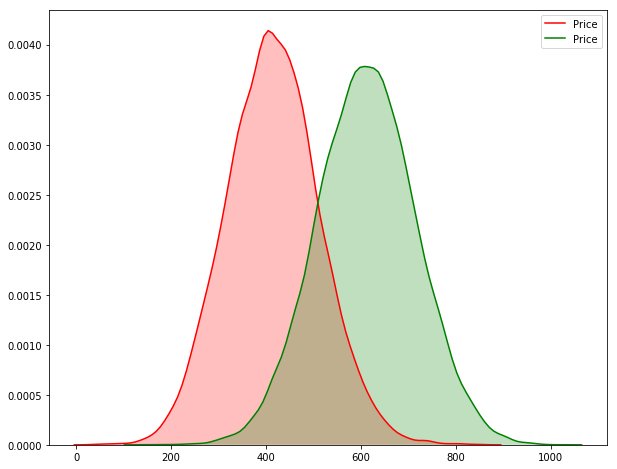

In [51]:
## Distribution Analysis
plt.figure(figsize=(10,8))
ax = sns.kdeplot(df[df['Sale'] == 0]['Price'], shade=True, color="r")
ax = sns.kdeplot(df[df['Sale'] == 1]['Price'], shade=True, color="g")

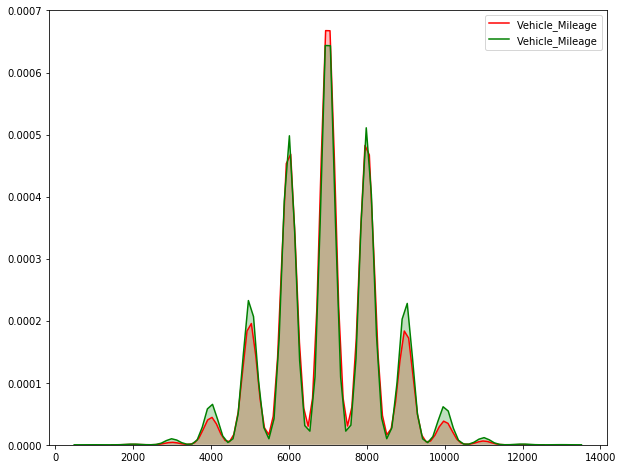

In [52]:
plt.figure(figsize=(10,8))
ax = sns.kdeplot(df[df['Sale'] == 0]['Vehicle_Mileage'], shade=True, color="r")
ax = sns.kdeplot(df[df['Sale'] == 1]['Vehicle_Mileage'], shade=True, color="g")

Performing PCA for 2 components


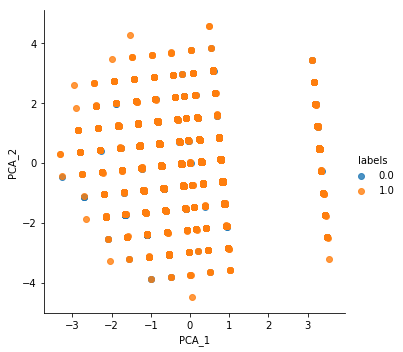

In [53]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X= df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years']]
Y_imputed= df['Sale']

print("Performing PCA for 2 components")
pca = PCA(n_components=2)
pca0 = pca.fit_transform(X)
pca0 = StandardScaler().fit_transform(pca0)


import matplotlib
matplotlib.rcParams['figure.figsize'] = (40.0, 40.0)
proj = pd.DataFrame(pca0)
proj.columns = ["PCA_1", "PCA_2"]
proj["labels"] = Y_imputed#.map(a)

sns.lmplot("PCA_1", "PCA_2", hue = "labels", data = proj ,fit_reg=False)

In [54]:
##Removed outlier usin gIter Quartile range
Q1 = df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years','Marital_Status_D','Marital_Status_M','Marital_Status_S','Sale']].quantile(0.25)
Q3 = df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years','Marital_Status_D','Marital_Status_M','Marital_Status_S','Sale']].quantile(0.75)
IQR = Q3 - Q1

#print(df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years','Marital_Status_D','Marital_Status_M','Marital_Status_S','Sale']] < (Q1 - 1.5 * IQR)) |(df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years','Marital_Status_D','Marital_Status_M','Marital_Status_S','Sale']] > (Q3 + 1.5 * IQR))
df_out = df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years','Marital_Status_D','Marital_Status_M','Marital_Status_S','Sale']][~((df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years','Marital_Status_D','Marital_Status_M','Marital_Status_S','Sale']] < (Q1 - 1.5 * IQR)) |(df[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years','Marital_Status_D','Marital_Status_M','Marital_Status_S','Sale']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [55]:
from sklearn.model_selection import train_test_split
X= df_out[['Driver_Age','Vehicle_Value','Tax','Price','Vehicle_Mileage','Credit_Score','Licence_Length_Years', 'Marital_Status_D','Marital_Status_M','Marital_Status_S']]
Y = df_out['Sale']


In [56]:
#

In [57]:
X_train, X_test, y_train, y_test =  train_test_split(X, Y , stratify = Y , test_size=0.4)

In [58]:
## Logistic Regresion

In [59]:


from sklearn import model_selection,discriminant_analysis, tree, neighbors,  ensemble,  gaussian_process,naive_bayes,linear_model
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,f1_score 
from sklearn.externals.six import StringIO  
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#frames = [df1, df2, df3]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.model_selection import train_test_split
import gc
gc.collect()

log_model = linear_model.LogisticRegressionCV()
#Train the model using the training sets
log_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = log_model.predict(X_test)

predictions = log_model.predict(X_test)
#prediction_ = np.argmax(to_categorical(predictions), axis = 1)
y_pred =pd.DataFrame(predictions)
y_pred.columns = ['Pred']
#y_test = pd.DataFrame(uniques[y_test.argmax(1)])
y_test.columns = ['Actual']
#y_test['Actual'].value_counts()

Accuracy 0.8775973250537378
F1 score: 0.8763798084182748
precision score: 0.8759108868002745
recall score: 0.8775973250537378


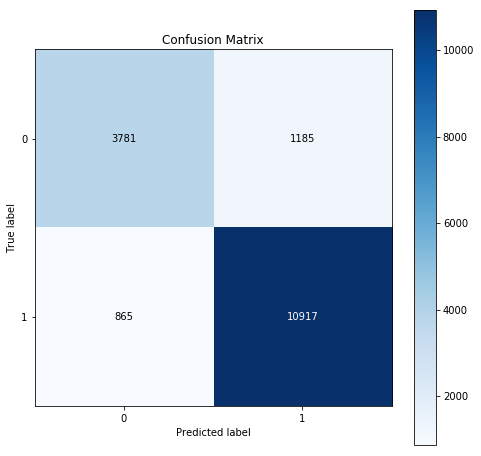

In [64]:
from sklearn.metrics import accuracy_score

print('Accuracy',accuracy_score(y_test, y_pred))

import scikitplot as skplt

print("F1 score:",f1_score(y_test, y_pred,average='weighted'))
print("precision score:",precision_score(y_test, y_pred,average='weighted'))
print("recall score:",recall_score(y_test, y_pred,average='weighted'))

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(8,8))


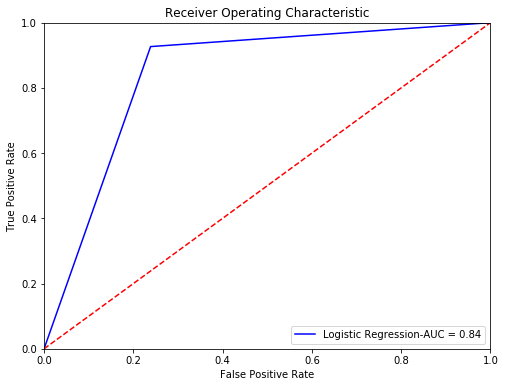

In [65]:
from sklearn.metrics import roc_curve
from sklearn import metrics

pred_proba = log_model.predict(X_test)

fpr,tpr,thresholds=roc_curve(y_test, pred_proba)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Logistic Regression-AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [66]:
## decision Tree

Accuracy 0.8744924767136375
F1 score: 0.873538975003687
precision score: 0.8730293378025171
recall score: 0.8744924767136375


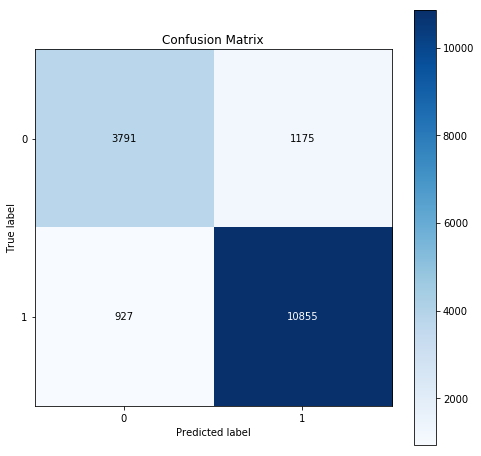

In [67]:
dt_tree = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', 
                                      max_depth=20, max_features=None, max_leaf_nodes=None,  
                                      min_impurity_decrease=0.0, min_impurity_split=None, 
                                      min_samples_leaf=10, min_samples_split=50,
                                      min_weight_fraction_leaf=0.0, presort=False, 
                                      random_state=None, splitter='best') 



dt_tree.fit(X_train, y_train)

predictions = dt_tree.predict(X_test)
#prediction_ = np.argmax(to_categorical(predictions), axis = 1)
y_pred =pd.DataFrame(predictions)
y_pred.columns = ['Pred']
#y_test = pd.DataFrame(uniques[y_test.argmax(1)])
y_test.columns = ['Actual']

from sklearn.metrics import accuracy_score

print('Accuracy',accuracy_score(y_test, y_pred))

import scikitplot as skplt

print("F1 score:",f1_score(y_test, y_pred,average='weighted'))
print("precision score:",precision_score(y_test, y_pred,average='weighted'))
print("recall score:",recall_score(y_test, y_pred,average='weighted'))

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(8,8))

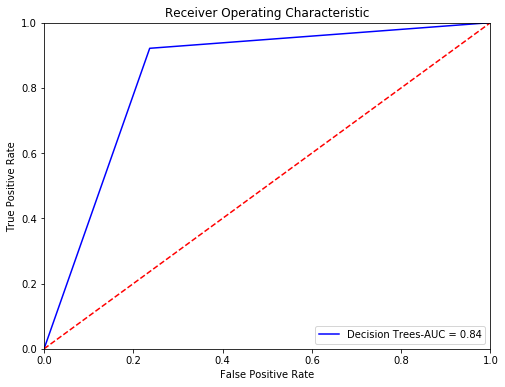

In [68]:
from sklearn.metrics import roc_curve
from sklearn import metrics

pred_proba = dt_tree.predict(X_test)

fpr,tpr,thresholds=roc_curve(y_test, pred_proba)
roc_auc = metrics.auc(fpr, tpr)


plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Decision Trees-AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [69]:
###Gradient Boosting

Accuracy 0.8848817769285885
F1 score: 0.8839477550941882
precision score: 0.8835267604962719
recall score: 0.8848817769285885


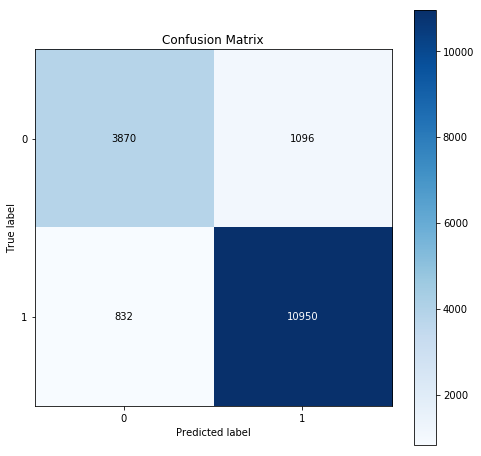

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
      max_depth=1, random_state=0).fit(X_train, y_train)



predictions = clf.predict(X_test)
#prediction_ = np.argmax(to_categorical(predictions), axis = 1)
y_pred =pd.DataFrame(predictions)
y_pred.columns = ['Pred']
#y_test = pd.DataFrame(uniques[y_test.argmax(1)])
y_test.columns = ['Actual']
#y_test['Actual'].value_counts(

#false_positive, true_positive, th = roc_curve(y_test, y_pred)
#print('\nPrecision',precision_score(y_test, y_pred)  )
#print('Recall', recall_score(y_test, y_pred))
#print('F1 Score', f1_score(y_test, y_pred, average ='weighted')   )
#print('AUC', auc(false_positive, true_positive)   )
from sklearn.metrics import accuracy_score

print('Accuracy',accuracy_score(y_test, y_pred))

print("F1 score:",f1_score(y_test, y_pred,average='weighted'))
print("precision score:",precision_score(y_test, y_pred,average='weighted'))
print("recall score:",recall_score(y_test, y_pred,average='weighted'))

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(8,8))


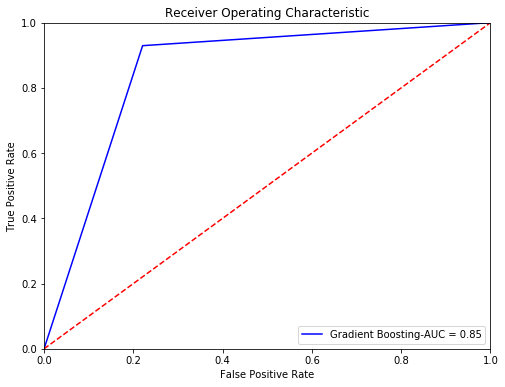

In [71]:
from sklearn.metrics import roc_curve
from sklearn import metrics

pred_proba = clf.predict(X_test)

fpr,tpr,thresholds=roc_curve(y_test, pred_proba)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Gradient Boosting-AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
## Support Vector Machine

Accuracy 0.8606400764270361
F1 score: 0.8559471618262325
precision score: 0.8581963409868328
recall score: 0.8606400764270361


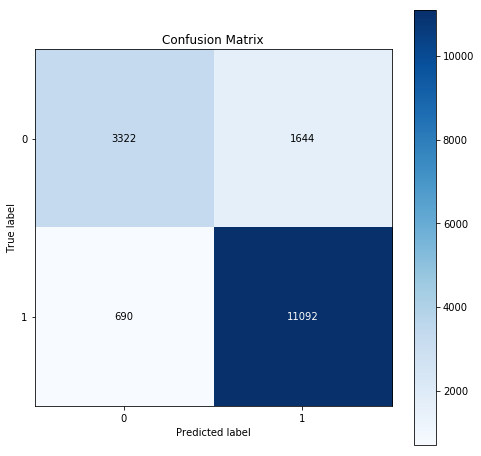

In [73]:
from sklearn import svm
clf_svm = svm.SVC(gamma='scale', decision_function_shape='ovo')

clf_svm.fit(X_train, y_train)

predictions = clf_svm.predict(X_test)
#prediction_ = np.argmax(to_categorical(predictions), axis = 1)
y_pred =pd.DataFrame(predictions)
y_pred.columns = ['Pred']
#y_test = pd.DataFrame(uniques[y_test.argmax(1)])
y_test.columns = ['Actual']
#y_test['Actual'].value_counts(

#false_positive, true_positive, th = roc_curve(y_test, y_pred)
#print('\nPrecision',precision_score(y_test, y_pred)  )
#print('Recall', recall_score(y_test, y_pred))
#print('F1 Score', f1_score(y_test, y_pred, average ='weighted')   )
#print('AUC', auc(false_positive, true_positive)   )
from sklearn.metrics import accuracy_score

print('Accuracy',accuracy_score(y_test, y_pred))

import scikitplot as skplt

print("F1 score:",f1_score(y_test, y_pred,average='weighted'))
print("precision score:",precision_score(y_test, y_pred,average='weighted'))
print("recall score:",recall_score(y_test, y_pred,average='weighted'))

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(8,8))



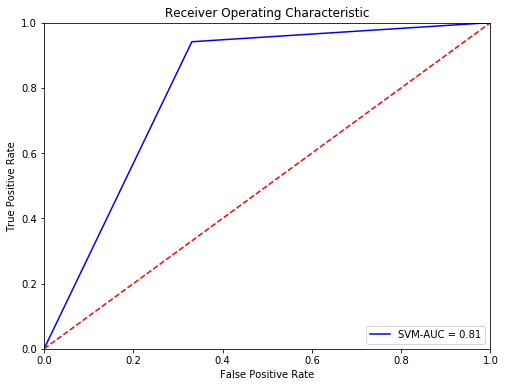

In [74]:
from sklearn.metrics import roc_curve
from sklearn import metrics

pred_proba = clf_svm.predict(X_test)

fpr,tpr,thresholds=roc_curve(y_test, pred_proba)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'SVM-AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
### Neural Netowork

In [96]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from keras.utils import to_categorical
import tensorflow as tf
from keras import backend as K
import keras
from keras import regularizers
from collections import Counter
from sklearn.metrics import confusion_matrix

X_valid, X_test, y_valid, y_test =  train_test_split( X_test, y_test , stratify = y_test, test_size=0.5)



start_neurons =8
model = Sequential()
model.add(Dense(start_neurons, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
    
model.add(Dense(start_neurons//2,activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
    
"""model.add(Dense(start_neurons//2,activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))"""
    
model.add(Dense(1, activation='sigmoid'))

In [97]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 88        
_________________________________________________________________
batch_normalization_5 (Batch (None, 8)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
batch_normalization_6 (Batch (None, 4)                 16        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 177
Trainable params: 153
Non-trainable params: 24
_________________________________________________________________


In [98]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train,  validation_data = (X_valid ,y_valid), epochs=20,  verbose=2)

Train on 25121 samples, validate on 2093 samples
Epoch 1/20
 - 1s - loss: 0.4509 - acc: 0.7911 - val_loss: 0.4960 - val_acc: 0.7735
Epoch 2/20
 - 1s - loss: 0.3234 - acc: 0.8569 - val_loss: 0.3122 - val_acc: 0.8662
Epoch 3/20
 - 1s - loss: 0.3173 - acc: 0.8591 - val_loss: 0.3011 - val_acc: 0.8686
Epoch 4/20
 - 1s - loss: 0.3102 - acc: 0.8646 - val_loss: 0.3044 - val_acc: 0.8720
Epoch 5/20
 - 1s - loss: 0.3103 - acc: 0.8628 - val_loss: 0.3311 - val_acc: 0.8562
Epoch 6/20
 - 1s - loss: 0.3072 - acc: 0.8673 - val_loss: 0.3519 - val_acc: 0.8524
Epoch 7/20
 - 1s - loss: 0.3050 - acc: 0.8685 - val_loss: 0.3045 - val_acc: 0.8681
Epoch 8/20
 - 1s - loss: 0.3032 - acc: 0.8698 - val_loss: 0.2972 - val_acc: 0.8734
Epoch 9/20
 - 1s - loss: 0.3028 - acc: 0.8689 - val_loss: 0.3172 - val_acc: 0.8629
Epoch 10/20
 - 1s - loss: 0.3041 - acc: 0.8673 - val_loss: 0.2949 - val_acc: 0.8748
Epoch 11/20
 - 1s - loss: 0.3022 - acc: 0.8699 - val_loss: 0.3841 - val_acc: 0.8290
Epoch 12/20
 - 1s - loss: 0.2982 - a

Accuracy 0.8681948424068768
F1 score: 0.8632756237582246
precision score: 0.8668266379444813
recall score: 0.8681948424068768


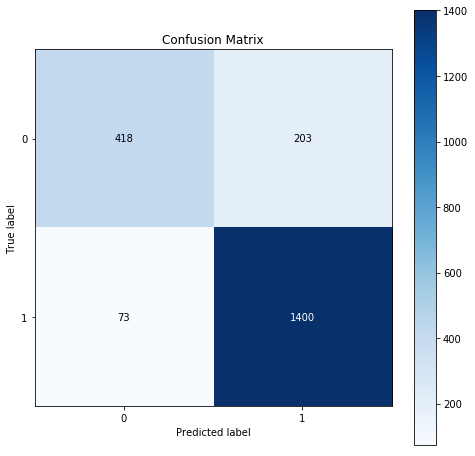

In [99]:


predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1,0)
#predictions = np.argmax(to_categorical(predictions), axis = 1)
y_pred =pd.DataFrame(predictions)
y_pred.columns = ['Pred']
#y_test = pd.DataFrame(uniques[y_test.argmax(1)])
y_test.columns = ['Actual']
#y_test['Actual'].value_counts(

#false_positive, true_positive, th = roc_curve(y_test, y_pred)
#print('\nPrecision',precision_score(y_test, y_pred)  )
#print('Recall', recall_score(y_test, y_pred))
#print('F1 Score', f1_score(y_test, y_pred, average ='weighted')   )
#print('AUC', auc(false_positive, true_positive)   )
from sklearn.metrics import accuracy_score

print('Accuracy',accuracy_score(y_test, y_pred))

print("F1 score:",f1_score(y_test, y_pred,average='weighted'))
print("precision score:",precision_score(y_test, y_pred,average='weighted'))
print("recall score:",recall_score(y_test, y_pred,average='weighted'))

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(8,8))



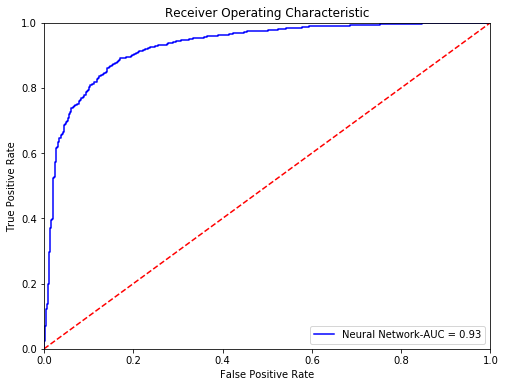

In [100]:

pred_proba = model.predict(X_test)

fpr,tpr,thresholds=roc_curve(y_test, pred_proba)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Neural Network-AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Training the model...
[1]	train's auc: 0.522287	valid's auc: 0.503591
Training until validation scores don't improve for 50 rounds.
[2]	train's auc: 0.522287	valid's auc: 0.503591
[3]	train's auc: 0.855729	valid's auc: 0.85352
[4]	train's auc: 0.854659	valid's auc: 0.851883
[5]	train's auc: 0.852164	valid's auc: 0.84884
[6]	train's auc: 0.852164	valid's auc: 0.84884
[7]	train's auc: 0.854133	valid's auc: 0.849945
[8]	train's auc: 0.85054	valid's auc: 0.845189
[9]	train's auc: 0.85054	valid's auc: 0.845189
[10]	train's auc: 0.847289	valid's auc: 0.84103
[11]	train's auc: 0.905301	valid's auc: 0.902901
[12]	train's auc: 0.905301	valid's auc: 0.902901
[13]	train's auc: 0.90513	valid's auc: 0.902772
[14]	train's auc: 0.89741	valid's auc: 0.895393
[15]	train's auc: 0.907804	valid's auc: 0.90615
[16]	train's auc: 0.91195	valid's auc: 0.910396
[17]	train's auc: 0.912278	valid's auc: 0.910604
[18]	train's auc: 0.912379	valid's auc: 0.910445
[19]	train's auc: 0.912138	valid's auc: 0.91006
[20]	

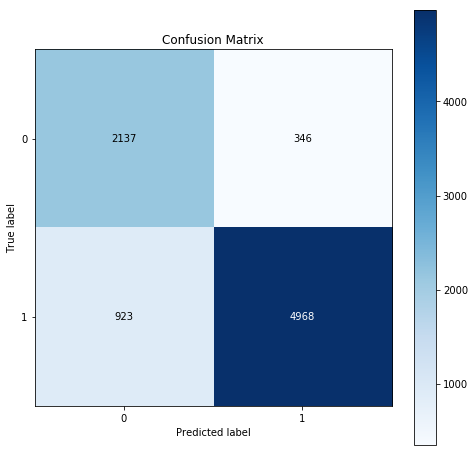

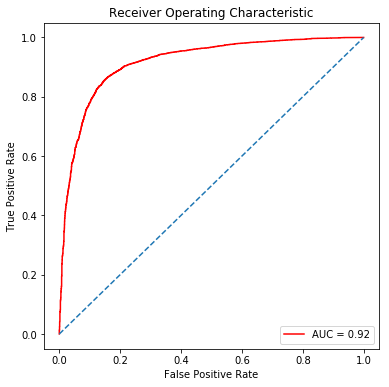

In [84]:
#X_train, X_valid, y_train, y_valid, X_test, y_test = data_split(X, Y)
import lightgbm as lgb
params = {
    'num_leaves': 18,
     'max_bin': 63,
     'min_data_in_leaf': 5,
     'learning_rate': 0.010614430970330217,
     'min_sum_hessian_in_leaf': 0.0093586657313989123,
     'feature_fraction': 0.056701788569420042,
     'lambda_l1': 0.060222413158420585,
     'lambda_l2': 4.6580550589317573,
     'min_gain_to_split': 0.29588543202055562,
     'max_depth': 49,
     'save_binary': True,
     'seed': 1337,
     'feature_fraction_seed': 1337,
     'bagging_seed': 1337,
     'drop_seed': 1337,
     'data_random_seed': 1337,
     'objective': 'binary',
     'boosting_type': 'gbdt',
     'verbose': 1,
     'metric': 'auc',
     'is_unbalance': True,
     'boost_from_average': False
}
dtrain = lgb.Dataset(X_train.values, label=y_train,
                  #    feature_name=predictors#,
                  #    categorical_feature=categorical
                      )
dvalid = lgb.Dataset(X_valid.values, label=y_valid,
                    #  feature_name=predictors#,
                #      categorical_feature=categorical
                      )
                      
# When I ran the code, I get two warnings related to this chunk of the code: 
# 1. Saying that I have categorical features in my Dataset 
# 2. Saying something about overwriting the 'params' dictionary introduced below.

evals_results = {}

print("Training the model...")

lgb_model = lgb.train(params, 
                 dtrain, 
                 valid_sets=[dtrain, dvalid], 
                 valid_names=['train','valid'], 
                 evals_result=evals_results, 
                 num_boost_round=2000,
                 early_stopping_rounds=50,
                 verbose_eval=True, 
                 feval=None)


gc.collect()
predictions = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
predictions = np.where(predictions > 0.5, 1,0)


y_prob =  lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
#prediction_ = np.argmax(to_categorical(predictions), axis = 1)
y_pred =pd.DataFrame(predictions)
y_pred.columns = ['Pred']
#y_test = pd.DataFrame(uniques[y_test.argmax(1)])
y_test.columns = ['Actual']
#y_test['Actual'].value_counts(



false_positive, true_positive, th = roc_curve(y_test, y_prob)
print('Precision',precision_score(y_test, y_pred)  )
print('Recall', recall_score(y_test, y_pred))
print('F1 Score', f1_score(y_test, y_pred, average ='weighted')   )
print('AUC', auc(false_positive, true_positive)   )
from sklearn.metrics import accuracy_score

print('Accuracy',accuracy_score(y_test, y_pred))

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(8,8))

plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive,true_positive, color='red',label = 'AUC = %0.2f' % auc(false_positive, true_positive) ) 


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Normal', 'Warning']))

In [88]:
import xgboost as xgb

# fit model no training data
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 score:",f1_score(y_test, y_pred,average='weighted'))
print("precision score:",precision_score(y_test, y_pred,average='weighted'))
print("recall score:",recall_score(y_test, y_pred,average='weighted'))
print('AUC', auc(false_positive, true_positive)   )


Accuracy: 88.85%
F1 score: 0.8878297229144739
precision score: 0.887454872916162
recall score: 0.8884642942440888
AUC 0.9170394329035473


Accuracy 0.8753283974205875
F1 score: 0.8749275075796126
precision score: 0.8746097662896692
recall score: 0.8753283974205875
AUC 0.9170394329035473


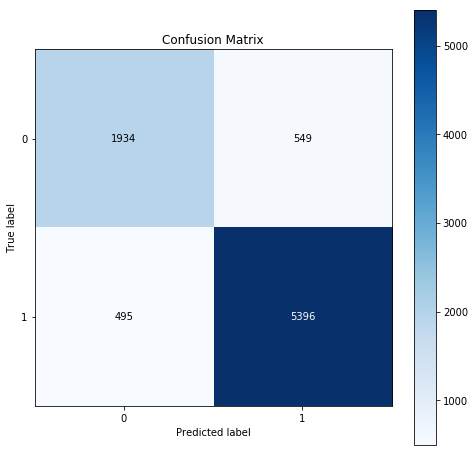

In [90]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)
predictions = np.where(predictions > 0.5, 1,0)
#prediction_ = np.argmax(to_categorical(predictions), axis = 1)
y_pred =pd.DataFrame(predictions)
y_pred.columns = ['Pred']
#y_test = pd.DataFrame(uniques[y_test.argmax(1)])
y_test.columns = ['Actual']
#y_test['Actual'].value_counts(

#false_positive, true_positive, th = roc_curve(y_test, y_pred)
#print('\nPrecision',precision_score(y_test, y_pred)  )
#print('Recall', recall_score(y_test, y_pred))
#print('F1 Score', f1_score(y_test, y_pred, average ='weighted')   )
#print('AUC', auc(false_positive, true_positive)   )
from sklearn.metrics import accuracy_score

print('Accuracy',accuracy_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred,average='weighted'))
print("precision score:",precision_score(y_test, y_pred,average='weighted'))
print("recall score:",recall_score(y_test, y_pred,average='weighted'))
print('AUC', auc(false_positive, true_positive)   )
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(8,8))

